(24, 24, 3)


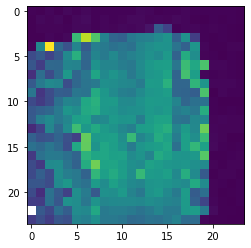

In [2]:
import os
import sys
from utils import *
from pprint import pprint


# 解压cam1结果结构的文件夹，并传给experiments{}
def cam1_exp_list(cam_folder):
    reflectance = find_all_sub_folder_name(cam_folder)
    experiments = {}  # 实验数据
    for i in reflectance:
        depth_list_path = cam_folder + i
        depth_list = find_all_sub_folder_name(depth_list_path)
        tmp = {}
        for j in depth_list:
            file_list_path = depth_list_path+"/"+j
            file_list = find_all_sub_folder_name(file_list_path)
            
            tmp[j] = []
            bin_list = [file_list_path + '/' + s for s in file_list if '.bin' in s]
            tmp[j].append(bin_list)
            hist_list = [file_list_path + '/' + s for s in file_list if 'hist3_depth' in s]
            tmp[j].append(hist_list)
            noise_list = [file_list_path + '/' + s for s in file_list if 'noiseFloor' in s]
            tmp[j].append(noise_list)
            peak_list = [file_list_path + '/' + s for s in file_list if 'peakDet' in s]
            tmp[j].append(peak_list)
            peak_Height_list = [file_list_path + '/' + s for s in file_list if 'peakHeight' in s]
            tmp[j].append(peak_Height_list)
            XYZ_list = [file_list_path + '/' + s for s in file_list if 'XYZ' in s]
            tmp[j].append(XYZ_list)
        experiments[i] = tmp
    # pprint(experiments["20%"]["0.10m"])
    return experiments


# 解压cam2结果结构的文件夹，并传给experiments{}
def cam2_exp_list(cam_folder):
    reflectance = find_all_sub_folder_name(cam_folder)
    experiments = {}  # 实验数据 experiments = {"20%":{"0.15m":{"1burst_high":}} }
    for i in reflectance:  # ["20%"]
        depth_list_path = cam_folder + i
        depth_list = find_all_sub_folder_name(depth_list_path) 
        tmp_module = {}
        for j in depth_list:  # ["0.15m"]
            module_list_path = depth_list_path+"/"+j
            module_list = find_all_sub_folder_name(module_list_path) 
            tmp_dist = {}
            for k in module_list:  # ["1burst_high"]
                file_list_path = module_list_path + "/" + k
                file_list = find_all_sub_folder_name(file_list_path)
                tmp_dist[k] = []
                bin_list = [file_list_path + '/' + s for s in file_list if '.zbin' in s]
                tmp_dist[k].append(bin_list)
                hist_list = [file_list_path + '/' + s for s in file_list if 'hist3_depth' in s]
                tmp_dist[k].append(hist_list)
                noise_list = [file_list_path + '/' + s for s in file_list if 'noiseFloor' in s]
                tmp_dist[k].append(noise_list)
                peak_list = [file_list_path + '/' + s for s in file_list if 'peakDet' in s]
                tmp_dist[k].append(peak_list)
                peak_Height_list = [file_list_path + '/' + s for s in file_list if 'peakHeight' in s]
                tmp_dist[k].append(peak_Height_list)
                XYZ_list = [file_list_path + '/' + s for s in file_list if 'XYZ' in s]
                tmp_dist[k].append(XYZ_list)
            tmp_module[j] = tmp_dist
        experiments[i] = tmp_module
    # print(experiments.keys())
    # print(experiments["20%"].keys())
    # print(experiments["20%"]["2.00m"].keys())
    # pprint(experiments["20%"]["2.00m"]["1burst_low"][:5])
    return experiments


# 读取peak list
def read_peak_height(peakheight_path):  # 假设是 top1~top1; top2~top2; top3~top3
    # 读取 peakheight.csv 文件，得到peak height.
    path = peakheight_path
    csv_reader = csv.reader(open(path))
    result = []
    for line in csv_reader:
        line = float(line[0])
        result.append(line)
    result = np.array(result)
    try:
        result = np.split(result, 3) # 3等分划分，或者使用np.array_split(result, 3), split必须三等分
    except Exception as e:
        print("peak height cannot split to 3 parts") 
    return result


def reshpae_peak_to_display(peak_list):
    peak_array = np.array(peak_list)
    peak_3d_array = np.zeros((24,24,3))
    for i,key in enumerate(peak_array):
        peak_3d_array[:, :, i] = key.reshape(24, 24)
    return peak_3d_array


if __name__ == "__main__":

    root_path = r"/home/zhangyouan/桌面/zya/TOF/611/20230421_reflectance_study/"
    cam1_folder = r"20221202_study_reflectance_7.5m_4burst_camA114/"
    cam2_folder = r"20221230_611ES_cam068_performances/"

    cam1 = root_path + cam1_folder
    cam2 = root_path + cam2_folder
    
    experiments =  cam2_exp_list(cam2)
    for i in experiments.keys():
        depth_list = experiments[i].keys()
        for j in depth_list:
            module_list = experiments[i][j].keys()
            for k in module_list:   
                peak_height_path = experiments[i][j][k][4]
                peak_height_path = np.sort(peak_height_path)
                
                if i == "20%": # reflectance
                    if j == "1.00m":
                        if k == "1burst_high":
                            # print(peak_height_path[0])
                            peak_path = peak_height_path[0]
                            peak_list = read_peak_height(peak_path)
                            peak_3d_array = reshpae_peak_to_display(peak_list)
                            print(np.shape(peak_3d_array))
                            fg = plt.figure()
                            plt.imshow(peak_3d_array[:,:,0])
                            plt.show()

(24, 24, 3)


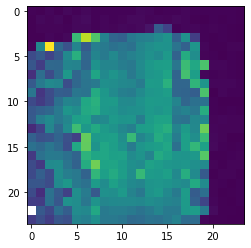

['2.00m', '1burst_low', 0.0]
['2.00m', '1burst_high', 2985.0]
['2.00m', '4burst_low', 0.0]
['2.00m', '4burst_high', 3104.625]
['0.15m', '1burst_low', 0.0]
['0.15m', '1burst_high', 1664.625]
['0.15m', '4burst_low', 0.0]
['0.15m', '4burst_high', 1635.125]
['4.00m', '1burst_low', 0.0]
['4.00m', '1burst_high', 1041.625]
['4.00m', '4burst_low', 0.0]
['4.00m', '4burst_high', 992.375]
['7.00m', '1burst_low', 0.0]
['7.00m', '1burst_high', 346.375]
['7.00m', '4burst_low', 0.0]
['7.00m', '4burst_high', 335.75]
['0.25m', '1burst_low', 0.0]
['0.25m', '1burst_high', 2828.375]
['0.25m', '4burst_low', 0.0]
['0.25m', '4burst_high', 2720.625]
['6.00m', '1burst_low', 0.0]
['6.00m', '1burst_high', 495.125]
['6.00m', '4burst_low', 0.0]
['6.00m', '4burst_high', 462.625]
['1.00m', '1burst_low', 0.0]
['1.00m', '1burst_high', 6987.375]
['1.00m', '4burst_low', 0.0]
['1.00m', '4burst_high', 6785.0]
['3.00m', '1burst_low', 0.0]
['3.00m', '1burst_high', 1691.625]
['3.00m', '4burst_low', 0.0]
['3.00m', '4burst_hig

In [3]:
import os
from utils import *
from pprint import pprint

# import sys
# sys.path.insert(0, "/home/zhangyouan/桌面/zya/TOF/611/test1_area_ref_exploration")


# 解压cam2结果结构的文件夹，并传给experiments{}
def cam2_exp_list(cam_folder):
    reflectance = find_all_sub_folder_name(cam_folder)
    experiments = {}  # 实验数据 experiments = {"20%":{"0.15m":{"1burst_high":}} }
    for i in reflectance:  # ["20%"]
        depth_list_path = cam_folder + i
        depth_list = find_all_sub_folder_name(depth_list_path) 
        tmp_module = {}
        for j in depth_list:  # ["0.15m"]
            module_list_path = depth_list_path+"/"+j
            module_list = find_all_sub_folder_name(module_list_path) 
            tmp_dist = {}
            for k in module_list:  # ["1burst_high"]
                file_list_path = module_list_path + "/" + k
                file_list = find_all_sub_folder_name(file_list_path)
                tmp_dist[k] = []
                bin_list = [file_list_path + '/' + s for s in file_list if '.zbin' in s]
                tmp_dist[k].append(bin_list)
                hist_list = [file_list_path + '/' + s for s in file_list if 'hist3_depth' in s]
                tmp_dist[k].append(hist_list)
                noise_list = [file_list_path + '/' + s for s in file_list if 'noiseFloor' in s]
                tmp_dist[k].append(noise_list)
                peak_list = [file_list_path + '/' + s for s in file_list if 'peakDet' in s]
                tmp_dist[k].append(peak_list)
                peak_Height_list = [file_list_path + '/' + s for s in file_list if 'peakHeight' in s]
                tmp_dist[k].append(peak_Height_list)
                XYZ_list = [file_list_path + '/' + s for s in file_list if 'XYZ' in s]
                tmp_dist[k].append(XYZ_list)
                hist_s_list = [file_list_path + '/' + s for s in file_list if "hist_s_raw_00000000.csv" in s]
                tmp_dist[k].append(hist_s_list)
            tmp_module[j] = tmp_dist
        experiments[i] = tmp_module
    # print(experiments.keys())
    # print(experiments["20%"].keys())
    # print(experiments["20%"]["2.00m"].keys())
    # pprint(experiments["20%"]["2.00m"]["1burst_low"][:5])
    return experiments


# 读取peak list
def read_peak_height(peakheight_path):  # 假设是 top1~top1; top2~top2; top3~top3
    # 读取 peakheight.csv 文件，得到peak height.
    path = peakheight_path
    csv_reader = csv.reader(open(path))
    result = []
    for line in csv_reader:
        line = float(line[0])
        result.append(line)
    result = np.array(result)
    try:
        result = np.split(result, 3) # 3等分划分，或者使用np.array_split(result, 3), split必须三等分
    except Exception as e:
        print("peak height cannot split to 3 parts") 
    return result


def reshpae_peak_to_display(peak_list):
    peak_array = np.array(peak_list)
    peak_3d_array = np.zeros((24,24,3))
    for i,key in enumerate(peak_array):
        peak_3d_array[:, :, i] = key.reshape(24, 24)
    return peak_3d_array


# 读取 peak height数据；显示histogrim图像，验证读取方式是否正确；
def show_hist_demo():
    root_path = r"/home/zhangyouan/桌面/zya/TOF/611/20230421_reflectance_study/"
    cam1_folder = r"20221202_study_reflectance_7.5m_4burst_camA114/"
    cam2_folder = r"20221230_611ES_cam068_performances/"

    cam1 = root_path + cam1_folder
    cam2 = root_path + cam2_folder
    
    experiments =  cam2_exp_list(cam2)
    
    for i in experiments.keys():  # i是反射率：[20%, 90%]
        depth_list = experiments[i].keys()
        tmp_ref = []  # 用来存储不同深度，不同模式的area
        for j in depth_list:  # j 是深度
            module_list = experiments[i][j].keys()
            
            for k in module_list:   # k是模式
                # 1. 通过读取peak height绘制img;
                peak_height_path = experiments[i][j][k][4]
                peak_height_path = np.sort(peak_height_path)
            
                if i == "20%": # reflectance
                    if j == "1.00m":
                        if k == "1burst_high":
                            # show image of peak height;
                            peak_path = peak_height_path[0]
                            peak_list = read_peak_height(peak_path)
                            peak_3d_array = reshpae_peak_to_display(peak_list)
                            print(np.shape(peak_3d_array))
                            fg = plt.figure()
                            plt.imshow(peak_3d_array[:,:,0])
                            plt.show()


def calc_area_write2csv():
    root_path = r"/home/zhangyouan/桌面/zya/TOF/611/20230421_reflectance_study/"
    cam2_folder = r"20221230_611ES_cam068_performances/"
    thresh_rate = 0.1
    cam2 = root_path + cam2_folder
    
    experiments =  cam2_exp_list(cam2)
    
    for i in experiments.keys():  # i是反射率：[20%, 90%]
        depth_list = experiments[i].keys()
        tmp_ref = []  # 用来存储不同深度，不同模式的area
        for j in depth_list:  # j 是深度
            module_list = experiments[i][j].keys()
            
            for k in module_list:   # k是模式
                # 2. 计算area;
                hist_path = experiments[i][j][k][6]
                hist_path = np.sort(hist_path)
                
                tmp_j = []
                for k1 in hist_path:
                    peak_area_result = find_highest_peak_height_thresh_area(k1, threshrate=thresh_rate)  # (576,) 每个image 576个pixel,所以有576个area
                    wall_area_peak_height_area = find_wall_peak_area(peak_area_result, center_size=2) 
                    tmp_j.append(wall_area_peak_height_area)  # 每个depth，采了50张图片，所以tmp_j len为50；
                # print(len(tmp_j)) 
                
                tmp_j = [np.median(sorted(tmp_j))]  # 找50张图片的peak height area的中位数， 代表一个ref中，一个depth下面，一个module的peak height area
                tmp_j.insert(0, k)  # 在第一个位置增加 模式数值；[module, area]
                tmp_j.insert(0, j)  # 在第一个位置增加 深度数值；[depth, module, area]
                print(tmp_j)
                tmp_ref.append(tmp_j)  # 
        
        # 将数据按照第一个深度值进行排序；          
        tmp_ref_sorted = sorted(tmp_ref)
        depth_list = [float(s[0][:-1])*1.0 for s in tmp_ref_sorted]
        result = [float(s[2]) for s in tmp_ref_sorted]
        
        # # 画图表示深度值和area的变化情况；
        # fig = plt.figure()
        # plt.plot(depth_list, result)
        # plt.xlabel("depth")
        # plt.ylabel('area')
        # plt.show()
        
        # 数据写入csv.
        file2_path = "/home/zhangyouan/桌面/zya/TOF/611/test1_area_ref_exploration/"+"peak_height_raw_hist_area2_"+ str(thresh_rate*100)+ "_" + str(i) + "_all.csv"
        # print(tmp_ref_sorted)
        write2csv(tmp_ref_sorted, file_path=file2_path)
        
    
if __name__ == "__main__":
    show_hist_demo()
    calc_area_write2csv()

# 计算peak height

In [4]:
import os
from utils import *
from pprint import pprint


# 解压cam2结果结构的文件夹，并传给experiments{}
def cam2_exp_list(cam_folder):
    reflectance = find_all_sub_folder_name(cam_folder)
    experiments = {}  # 实验数据 experiments = {"20%":{"0.15m":{"1burst_high":}} }
    for i in reflectance:  # ["20%"]
        depth_list_path = cam_folder + i
        depth_list = find_all_sub_folder_name(depth_list_path) 
        tmp_module = {}
        for j in depth_list:  # ["0.15m"]
            module_list_path = depth_list_path+"/"+j
            module_list = find_all_sub_folder_name(module_list_path) 
            tmp_dist = {}
            for k in module_list:  # ["1burst_high"]
                file_list_path = module_list_path + "/" + k
                file_list = find_all_sub_folder_name(file_list_path)
                tmp_dist[k] = []
                bin_list = [file_list_path + '/' + s for s in file_list if '.zbin' in s]
                tmp_dist[k].append(bin_list)
                hist_list = [file_list_path + '/' + s for s in file_list if 'hist3_depth' in s]
                tmp_dist[k].append(hist_list)
                noise_list = [file_list_path + '/' + s for s in file_list if 'noiseFloor' in s]
                tmp_dist[k].append(noise_list)
                peak_list = [file_list_path + '/' + s for s in file_list if 'peakDet' in s]
                tmp_dist[k].append(peak_list)
                peak_Height_list = [file_list_path + '/' + s for s in file_list if 'peakHeight' in s]
                tmp_dist[k].append(peak_Height_list)
                XYZ_list = [file_list_path + '/' + s for s in file_list if 'XYZ' in s]
                tmp_dist[k].append(XYZ_list)
                hist_s_list = [file_list_path + '/' + s for s in file_list if "hist_s_raw_00000000.csv" in s]
                tmp_dist[k].append(hist_s_list)
            tmp_module[j] = tmp_dist
        experiments[i] = tmp_module
    # print(experiments.keys())
    # print(experiments["20%"].keys())
    # print(experiments["20%"]["2.00m"].keys())
    # pprint(experiments["20%"]["2.00m"]["1burst_low"][:5])
    return experiments


# 读取peak list
def read_peak_height(peakheight_path):  # 假设是 top1~top1; top2~top2; top3~top3
    # 读取 peakheight.csv 文件，得到peak height.
    path = peakheight_path
    csv_reader = csv.reader(open(path))
    result = []
    for line in csv_reader:
        line = float(line[0])
        result.append(line)
    result = np.array(result)
    try:
        result = np.split(result, 3) # 3等分划分，或者使用np.array_split(result, 3), split必须三等分
    except Exception as e:
        print("peak height cannot split to 3 parts") 
    return result


def reshape_peak_to_display(peak_list):
    peak_array = np.array(peak_list)
    peak_3d_array = np.zeros((24,24,3))
    for i,key in enumerate(peak_array):
        peak_3d_array[:, :, i] = key.reshape(24, 24)
    return peak_3d_array


# 读取 peak height数据；显示histogrim图像，验证读取方式是否正确；
def show_hist_demo():
    root_path = r"/home/zhangyouan/桌面/zya/TOF/611/20230421_reflectance_study/"
    cam2_folder = r"20221230_611ES_cam068_performances/"
    cam2 = root_path + cam2_folder
    
    experiments =  cam2_exp_list(cam2)
    
    for i in experiments.keys():  # i是反射率：[20%, 90%]
        depth_list = experiments[i].keys()
        tmp_ref = []  # 用来存储不同深度，不同模式的peak height
        for j in depth_list:  # j 是深度
            module_list = experiments[i][j].keys()
            
            for k in module_list:   # k是模式
                # 1. 通过读取peak height绘制img;
                peak_height_path = experiments[i][j][k][4]

                tmp_j = []
                for m in peak_height_path:
                    peak_list = read_peak_height(m)  # (3, 576)
                    max_peak = np.nanmax(peak_list)
                    tmp_j.append(max_peak)
                tmp_j = [np.median(sorted(tmp_j))]  # 找50张图片的peak height area的中位数， 代表一个ref中，一个depth下面，一个module的peak height area
                tmp_j.insert(0, k)  # 在第一个位置增加 模式数值；[module, peak_height]
                tmp_j.insert(0, j)  # 在第一个位置增加 深度数值；[depth, module, peak_height]
                print(tmp_j)
                tmp_ref.append(tmp_j)   
                
        tmp_ref_sorted = sorted(tmp_ref)    
        # 数据写入csv.
        file2_path = "/home/zhangyouan/桌面/zya/TOF/611/test1_area_ref_exploration/"+"peak_height_"+ str(i) + "_0515_all.csv"
        # print(tmp_ref_sorted)
        write2csv(tmp_ref_sorted, file_path=file2_path)
    
if __name__ == "__main__":
    show_hist_demo()

['2.00m', '1burst_low', 114.26336669921875]
['2.00m', '1burst_high', 2888.7532958984375]
['2.00m', '4burst_low', 112.6014518737793]
['2.00m', '4burst_high', 2890.775634765625]
['0.15m', '1burst_low', 1581.5538940429688]
['0.15m', '1burst_high', 4802.2080078125]
['0.15m', '4burst_low', 1590.8865966796875]
['0.15m', '4burst_high', 4660.8818359375]
['4.00m', '1burst_low', 63.68709373474121]
['4.00m', '1burst_high', 1881.3599243164062]
['4.00m', '4burst_low', 63.81021499633789]
['4.00m', '4burst_high', 1747.8140869140625]
['7.00m', '1burst_low', 54.391645431518555]
['7.00m', '1burst_high', 1332.9089965820312]
['7.00m', '4burst_low', 50.52791213989258]
['7.00m', '4burst_high', 1265.6309204101562]
['0.25m', '1burst_low', 2293.6844482421875]
['0.25m', '1burst_high', 11551.330078125]
['0.25m', '4burst_low', 2317.493896484375]
['0.25m', '4burst_high', 10795.55859375]
['6.00m', '1burst_low', 62.29605293273926]
['6.00m', '1burst_high', 1961.5665283203125]
['6.00m', '4burst_low', 64.05949401855469

In [ ]:
a = "23434234"
b = "234"
b-a